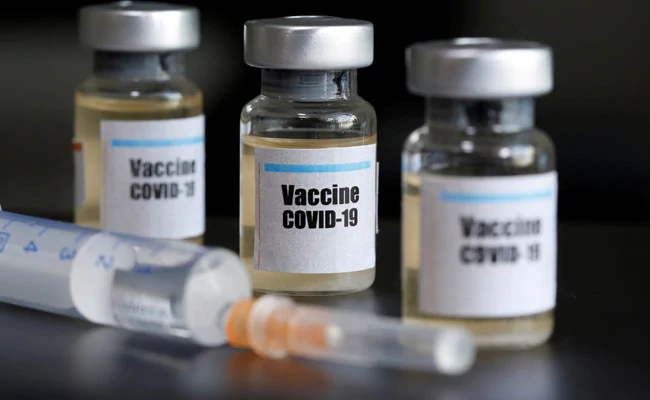

# Hello guys!



# Acknowledgement 

This Notebook would not have been possible without the dataset provided by @Gabriel Preda.

# Prerequisite

* I have made this notebook only through basic use of numpy,pandas.
* For virtuilisation I have used matplotlib.
* According to data sheet vaccination drive is going around the world in 78 different countries with more than 10 types of vaccines are being used.
* Feel free to leave any ideas or links to other datasets and notebooks that you feel would benefit this notebook.
* If you like this project then please upvote this is my frist ever project on kaggle

# Steps followed:
1. Basic Detail about data sheet
2. Top 20 countries which vaccinate more people
3. Analysis of which is most used vaccine
4. Vaccination as per capita
5. Record of daily vaccination in world

## Importing Basic library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

from collections import OrderedDict

%matplotlib inline

## Basic datail about data sheet

In [ ]:
# Reading csv as DataFrame
corona = pd.read_csv('../input/covid-world-vaccination-progress/country_vaccinations.csv')
corona.head()

In [ ]:
corona.info()

In [ ]:
corona.describe()

Countries included in datasheet

In [ ]:
corona.country.unique()

Vaccines used

In [ ]:
corona.vaccines.unique()

Feature


In [ ]:
print('Data point starts from ',corona.date.min(),'\n')
print('Data point ends at ',corona.date.max(),'\n')
print('Total no of countries in the data set ',len(corona.country.unique()),'\n')
print('Total no of unique vaccines in the data set ',len(corona.vaccines.unique()),'\n')

# Top 20 countries which vaccinate more people

I have represented top countries which vaccinate more people and for rest countries I had created a 'other' row which is basically sum of data to rest of countries

In [ ]:
#1 Rearranging the DataFrame
vaccine = corona.groupby(["country"]).sum()
vaccine = vaccine.sort_values(by=['total_vaccinations'], ascending=False)


#2 Creating an other index row for all remaing small countries 
vaccine.loc['Other']= vaccine.tail(75).sum()
# Here I have plotted top 15 country and rest vaccination are added on other column

#3 Sorting to get Other row in plot
vaccine = vaccine.sort_values(by=['total_vaccinations'], ascending=False)

#4 Display of final DataFrame
vaccine

In [ ]:
#1 Setup plot
fig ,ax = plt.subplots(figsize=(20,7))

#2 Plotting data
p1 = ax.bar(vaccine.head(20).index, vaccine.head(20)['total_vaccinations'], color='magenta', width=0.4)
p2 = ax.bar(vaccine.head(20).index, vaccine.head(20)['people_vaccinated'], color='purple', width=0.4)

#3 Customize the plot
plt.ylim(0 ,1300000000)
plt.xticks(rotation = 45);
ax.set(xlabel='country', ylabel='Total vaccine', title='What country is vaccinated more people?');



#4 Add legend
plt.legend((p1[0], p2[0]), ('Total vaccinations', 'People vaccinated'))

#4 Use plot style
plt.style.use('seaborn-whitegrid')

#### United States has vaccinate most people Followed by United Kingdom
Despite of having most number of corona case US the country is doing is's very best in corona war

# Analysis of which is most used vaccine

In [ ]:
vaccine_table=pd.DataFrame(corona.groupby(['vaccines'])['country'].unique())
pd.options.display.max_colwidth=300
vaccine_table=vaccine_table.reset_index()
vaccine_table

In [ ]:
pd = corona.groupby(["vaccines"]).sum()
pd = pd.sort_values(by=['total_vaccinations'], ascending=False)
pd

In [ ]:
#1 Setup plot
fig ,ax = plt.subplots(figsize=(20,7))

#2 Plotting data
p1 = ax.bar(pd.head(15).index, pd.head(15)['total_vaccinations'], color='teal', label='Vaccination', width=0.4)

#3 Customize the plot
plt.ylim(0 ,1300000000)
plt.xticks(rotation = 90);
ax.set(xlabel='Name of vaccine', ylabel='Total vaccine', title='Usage of diffrent vaccine');
ax.xaxis.label.set_color('black')


#4 Add legend
plt.legend()

#4 Use plot style
plt.style.use('seaborn-whitegrid')

# Vaccination as per capita

In [ ]:
vaccination_per_capita = corona.groupby(["country"]).sum()
vaccination_per_capita = vaccination_per_capita.sort_values(by=['total_vaccinations_per_hundred'], ascending=False)
vaccination_per_capita

In [ ]:
#1 Setup plot
fig ,ax = plt.subplots(figsize=(20,8))

#2 Plotting data
p1 = ax.bar(vaccination_per_capita.head(15).index, vaccination_per_capita.head(15)['total_vaccinations_per_hundred'], width=0.5)
p2 = ax.bar(vaccination_per_capita.head(15).index, vaccination_per_capita.head(15)['people_vaccinated_per_hundred'],width=0.5)
p3 = ax.bar(vaccination_per_capita.head(15).index, vaccination_per_capita.head(15)['people_fully_vaccinated_per_hundred'],width=0.5)

#3 Customize the plot
plt.xticks(rotation = 45);
ax.set(xlabel='country', ylabel='Total vaccine', title='What country is vaccinated a larger percent from its population?');

#4 Add legend
plt.legend((p1[0], p2[0], p3[0]), ('Total vaccinations per hundred', 'People vaccinated per hundred', 'People fully vaccinated per hundred'))

#4 Use plot style
plt.style.use('seaborn-whitegrid')

# Record of daily vaccination in world

In [ ]:
# Rearranging the DataFrame
vaccine_day = corona.groupby(["date"]).sum()[4:-1]
vaccine_day['total_vaccinations']

In [ ]:
#1 Setup plot
fig ,ax = plt.subplots(figsize=(20,8))

#2 Plotting data
p1 = ax.plot(vaccine_day.index, vaccine_day.total_vaccinations)
p2 = ax.scatter(vaccine_day.index, vaccine_day.total_vaccinations)
ax.set_xlim();


### What can bee seen, is that despite some days the amount of vaccinated people falls, the vaccination has strong long uptrend.

### Interesting Things Found
1. Pupular vaccines used around the world are Pfizer/BioNTech and Moderna.
2. Type of vaccines used in Europe are pretty consistent. Most of them are Pfizer/BioNTech and Moderna compare to other regions which are quite diverse.
3. Countries in Western Asia generally have higher total vaccinations ratio especially in Israel and United Arab Emirates compare to other Asia countries.
4. In Northern Europe, United Kingdom has highest total vaccinations ratio and quite a gap to others.
5. Northern Africa has lowest total vaccinations ratio after Southern Asia.

## Counclusion
COVID-19 has taken a heavy toll on mankind. We have lost far too many people and suffered too much for too long. Now is the time to fight back. Let 2021 be the year we reclaim what 2020 took from us. Regardless of what people might say, always wear a mask when out in public and maintain social distancing. DO NOT give in hearsay! Only when all of the graphs plotted inthe innumerable notebooks posted by the talented people on Kaggle point heavily in our favour, having dwarfed the damage this pandemic has already done, will be be able to call it a victory.

